In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib.colors import LogNorm
import matplotlib.colors as mcolors 
import sys
sys.path.append("../scripts")
from TrackReconstruction_functions import *
from reconstruction_functions import *

In [2]:
# diff = "nodiff"
diff = "5percent"
# diff = "0.25percent"
# diff = "0.1percent"
# diff = "0.05percent"
# diff = "0.0percent"
pressure = 1

# Set the detector size depending on the pressure
density = 5.987*pressure
M = 1000/0.9
det_size = 1000*np.cbrt((4 * M) / (np.pi * density))/2.0
print(det_size)

# ----------------------------------------------------------------------------------------------------
# Load in the files for plotting the background events

Tl                = pd.read_hdf(f"../data/TrackRecoFiltered/ATPC_Tl_ion_{pressure}bar_{diff}_reco.h5",    "data")
Tl_true_hits      = pd.read_hdf(f"../data/SelectedEvents/ATPC_Tl_ion_{pressure}bar_nexus_filtered.h5", "MC/hits")
Tl_true_parts     = pd.read_hdf(f"../data/SelectedEvents/ATPC_Tl_ion_{pressure}bar_nexus_filtered.h5", "MC/particles")

Bi                = pd.read_hdf(f"../data/TrackRecoFiltered/ATPC_Bi_ion_{pressure}bar_{diff}_reco.h5",    "data")
Bi_true_hits      = pd.read_hdf(f"../data/SelectedEvents/ATPC_Bi_ion_{pressure}bar_nexus_filtered.h5", "MC/hits")
Bi_true_parts     = pd.read_hdf(f"../data/SelectedEvents/ATPC_Bi_ion_{pressure}bar_nexus_filtered.h5", "MC/particles")


single                = pd.read_hdf(f"../data/TrackRecoFiltered/ATPC_single_{pressure}bar_{diff}_reco.h5",    "data")
single_true_hits      = pd.read_hdf(f"../data/SelectedEvents/ATPC_single_{pressure}bar_nexus_filtered.h5", "MC/hits")
single_true_parts     = pd.read_hdf(f"../data/SelectedEvents/ATPC_single_{pressure}bar_nexus_filtered.h5", "MC/particles")

Tl_diffused_hits  = pd.read_hdf(f"../data/SelectedEvents/ATPC_Tl_ion_{pressure}bar_{diff}_filtered.h5", "MC/hits")
Bi_diffused_hits  = pd.read_hdf(f"../data/SelectedEvents/ATPC_Bi_ion_{pressure}bar_{diff}_filtered.h5", "MC/hits")
single_diffused_hits  = pd.read_hdf(f"../data/SelectedEvents/ATPC_single_{pressure}bar_{diff}_filtered.h5", "MC/hits")


# Shift the positions
Tl["Type"] = "Tl"
Bi["Type"] = "Bi"
single["Type"] = "single"
Tl_true_hits["z"] = Tl_true_hits["z"] + det_size
Bi_true_hits["z"] = Bi_true_hits["z"] + det_size
single_true_hits["z"] = single_true_hits["z"] + det_size


# ----------------------------------------------------------------------------------------------------
# Load in the pickle files
bi_file = f"../data/TrackRecoFiltered/ATPC_Bi_ion_{pressure}bar_{diff}_trackreco.pkl"
tl_file = f"../data/TrackRecoFiltered/ATPC_Tl_ion_{pressure}bar_{diff}_trackreco.pkl"
single_file = f"../data/TrackRecoFiltered/ATPC_single_{pressure}bar_{diff}_trackreco.pkl"

# Load Bi data
with open(bi_file, 'rb') as pickle_file:
    Tracks_Bi = pickle.load(pickle_file)
    connections_Bi = pickle.load(pickle_file)
    connection_counts_Bi = pickle.load(pickle_file)

# Load Tl data
with open(tl_file, 'rb') as pickle_file:
    Tracks_Tl = pickle.load(pickle_file)
    connections_Tl = pickle.load(pickle_file)
    connection_counts_Tl = pickle.load(pickle_file)

# Load single data
with open(single_file, 'rb') as pickle_file:
    Tracks_single = pickle.load(pickle_file)
    connections_single = pickle.load(pickle_file)
    connection_counts_single = pickle.load(pickle_file)

# ----------------------------------------------------------------------------------------------------



3091.169274839764


In [3]:
Bi_cut = Bi_true_hits.event_id.unique()
Tl_cut = Tl_true_hits.event_id.unique()
single_cut = single_true_hits.event_id.unique()

print(len(Bi_cut), len(Tl_cut), len(single_cut))

2559 649 5640


{0: [np.int64(1), np.int64(2)], np.int64(1): [0, np.int64(4)], np.int64(4): [1, np.int64(7)], 2: [np.int64(5), np.int64(0)], np.int64(5): [2, np.int64(9)], 3: [np.int64(6)], np.int64(6): [3, np.int64(8)], np.int64(9): [5, np.int64(14)], 7: [np.int64(11), np.int64(4)], np.int64(11): [7, 10], 8: [np.int64(10), np.int64(6)], np.int64(10): [8, np.int64(11)], 12: [np.int64(13), np.int64(15)], np.int64(13): [12, np.int64(18)], 14: [np.int64(17), np.int64(9)], np.int64(17): [14, np.int64(21)], 15: [np.int64(19), np.int64(12)], np.int64(19): [15, 22], 16: [np.int64(18), np.int64(23)], np.int64(18): [16, np.int64(13)], np.int64(21): [17, np.int64(20)], 20: [np.int64(22), np.int64(21)], np.int64(22): [20, np.int64(19)], 23: [np.int64(27), np.int64(16)], np.int64(27): [23, np.int64(42)], 24: [np.int64(36), np.int64(25)], np.int64(36): [24, 37], 25: [np.int64(26), np.int64(24)], np.int64(26): [25, np.int64(32)], np.int64(32): [26, np.int64(34)], np.int64(42): [27, np.int64(57)], 28: [np.int64(31),

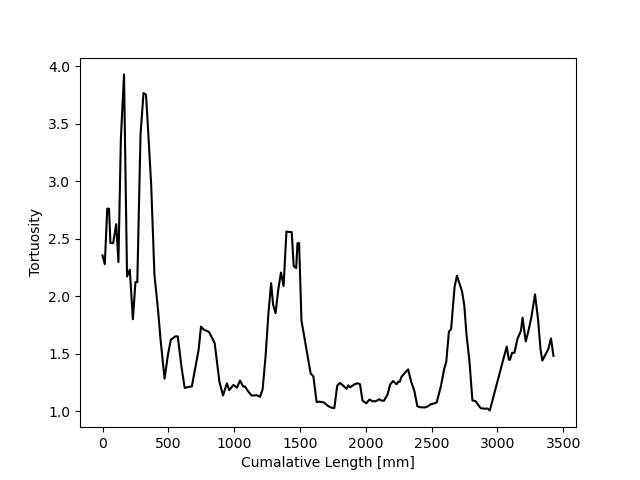

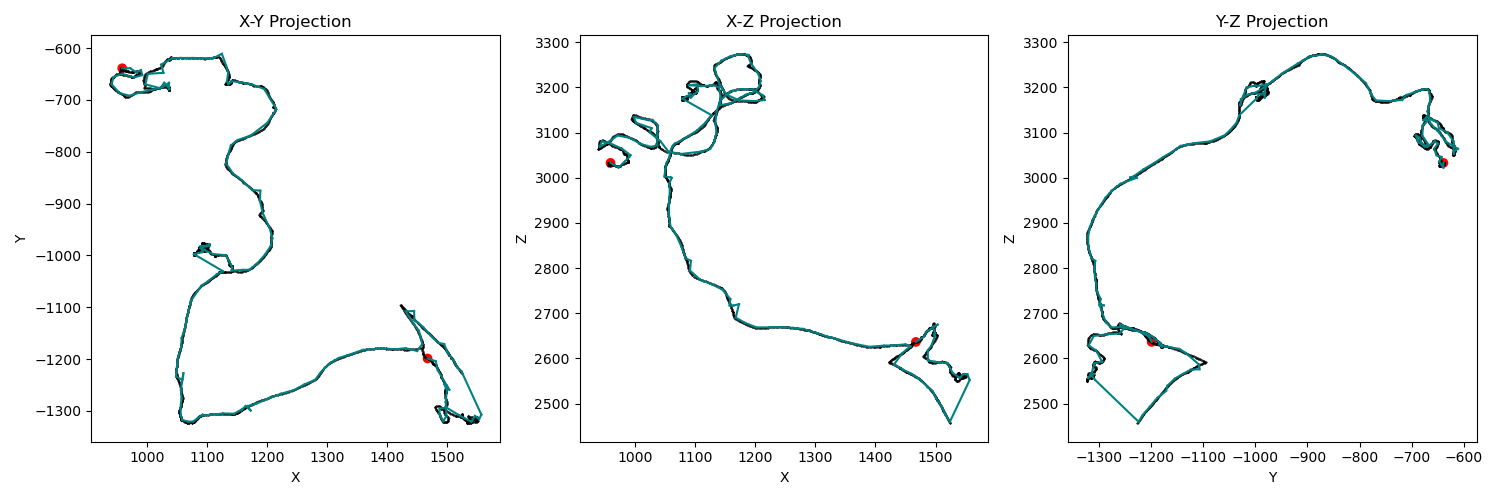

In [4]:
# 3D event display
%matplotlib widget

# mode = "Tl"
# mode = "Bi"
mode = "single"

if mode == "Bi":
    Bkg = Bi
    event_list = Bi_cut
    Bkg_Tracks = {**Tracks_Bi}
    Bkg_connections = {**connections_Bi}
    Bkg_connection_counts = {**connection_counts_Bi}
    Bkg_true_hits  =  Bi_true_hits
    Bkg_true_parts =  Bi_true_parts
    Bkg_diffused_hits = Bi_diffused_hits
elif mode == "Tl":
    Bkg = Tl
    event_list = Tl_cut
    Bkg_Tracks = {**Tracks_Tl}
    Bkg_connections = {**connections_Tl}
    Bkg_connection_counts = {**connection_counts_Tl}
    Bkg_true_hits  =  Tl_true_hits
    Bkg_true_parts =  Tl_true_parts
    Bkg_diffused_hits = Tl_diffused_hits
elif mode == "single":
    Bkg = single
    event_list = single_cut
    Bkg_Tracks = {**Tracks_single}
    Bkg_connections = {**connections_single}
    Bkg_connection_counts = {**connection_counts_single}
    Bkg_true_hits  =  single_true_hits
    Bkg_true_parts =  single_true_parts
    Bkg_diffused_hits = single_diffused_hits


# evid = 26984036
evid= event_list[0]
# evid = Tl_cut[10]

event       = Bkg[Bkg.event_id == evid]
event.index = event.id
Track       = Bkg_Tracks[evid]
connection  = Bkg_connections[evid]
connection_count = Bkg_connection_counts[evid]
event_hits_true  = Bkg_true_hits[Bkg_true_hits.event_id == evid]
event_parts_true = Bkg_true_parts[Bkg_true_parts.event_id == evid]
event_diffused_hits = Bkg_diffused_hits[Bkg_diffused_hits.event_id == evid]

print(connection)

plt.figure()

# plt.hist2d(event.cumulative_distance, event.angle, bins = 20,cmin=3);
plt.plot(event[event.primary == 1].cumulative_distance, event[event.primary == 1].Tortuosity, color="k");

plt.xlabel("Cumalative Length [mm]")
plt.ylabel("Tortuosity")

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
# Plot xy projection
plot_tracks(axs[0], event['x'], event['y'], connection_count, 'X', 'Y', Track)
axs[0].scatter(event_hits_true['x'], event_hits_true['y'], marker='o',c="k", s=0.1)

# Plot xz projection
plot_tracks(axs[1], event['x'], event['z'], connection_count, 'X', 'Z', Track)
axs[1].scatter(event_hits_true['x'], event_hits_true['z'], marker='o',c="k", s=0.1)

# Plot yz projection
plot_tracks(axs[2], event['y'], event['z'], connection_count, 'Y', 'Z', Track)
axs[2].scatter(event_hits_true['y'], event_hits_true['z'], marker='o',c="k", s=0.1)

plt.tight_layout()



On Event: 0 7176
On Event: 1 6981082
On Event: 2 6981177
On Event: 3 6981294
On Event: 4 6981355


,event_id,particle_id,particle_name,primary,mother_id,initial_x,initial_y,initial_z,initial_t,final_x,...,initial_momentum_x,initial_momentum_y,initial_momentum_z,final_momentum_x,final_momentum_y,final_momentum_z,kin_energy,length,creator_proc,final_proc
232341,6981355,4,e-,0,1,-1206.730469,-1159.315552,-830.226440,0.000517,-1848.982056,...,-2.891543,1.352547,-0.167707,0.000000,-0.000000,0.000000,2.726230,2331.655273,RadioactiveDecay,eIoni
232782,6981355,9,e-,0,4,-1393.307373,-1124.304199,-767.439209,0.690785,-1312.423462,...,-1.119443,-0.343775,0.526252,0.000000,0.000000,-0.000000,0.870810,1365.720337,eIoni,eIoni
232973,6981355,6,gamma,0,4,-1330.964966,-1135.884888,-794.457153,0.454041,-2948.040771,...,-0.247222,0.030929,0.056626,-0.000000,-0.000000,0.000000,0.255503,1682.550781,eBrem,phot
232987,6981355,638,e-,0,6,-2952.232422,-933.054565,-423.104950,6.043157,-2952.239502,...,-0.356872,-0.045660,0.030885,-0.000000,0.000000,-0.000000,0.114713,0.025473,compt,eIoni
232989,6981355,3,anti_nu_e,0,1,-1206.730469,-1159.315552,-830.226440,0.000517,45374.261719,...,0.201738,-0.771238,1.194597,0.201738,-0.771238,1.194597,1.436164,331607.750000,RadioactiveDecay,Transportation


e- 2726 RadioactiveDecay
e- 871 eIoni
On Event: 5 6987962
On Event: 6 6988010
On Event: 7 6988183
On Event: 8 6988364
On Event: 9 6994963
On Event: 10 6995075
On Event: 11 6995187
On Event: 12 7008989
On Event: 13 7009111
On Event: 14 7009175
On Event: 15 7022907
On Event: 16 7022952
On Event: 17 7023024
On Event: 18 7023068
On Event: 19 7036774
On Event: 20 7036858
On Event: 21 7036957
On Event: 22 7037043
On Event: 23 704685
On Event: 24 704762
On Event: 25 7050723
On Event: 26 7050808
On Event: 27 7051080
On Event: 28 7051122
On Event: 29 7057981
On Event: 30 7058096
On Event: 31 7064863
On Event: 32 7065025
On Event: 33 7078814
On Event: 34 7085775
On Event: 35 7085804
On Event: 36 7092746
On Event: 37 7092858
On Event: 38 7092865
On Event: 39 7092935
On Event: 40 7106692
On Event: 41 7106878
On Event: 42 7106883
On Event: 43 7106911
On Event: 44 7113527
On Event: 45 7113864
On Event: 46 711405
On Event: 47 711431
On Event: 48 711518
On Event: 49 711545
On Event: 50 711725
On Event

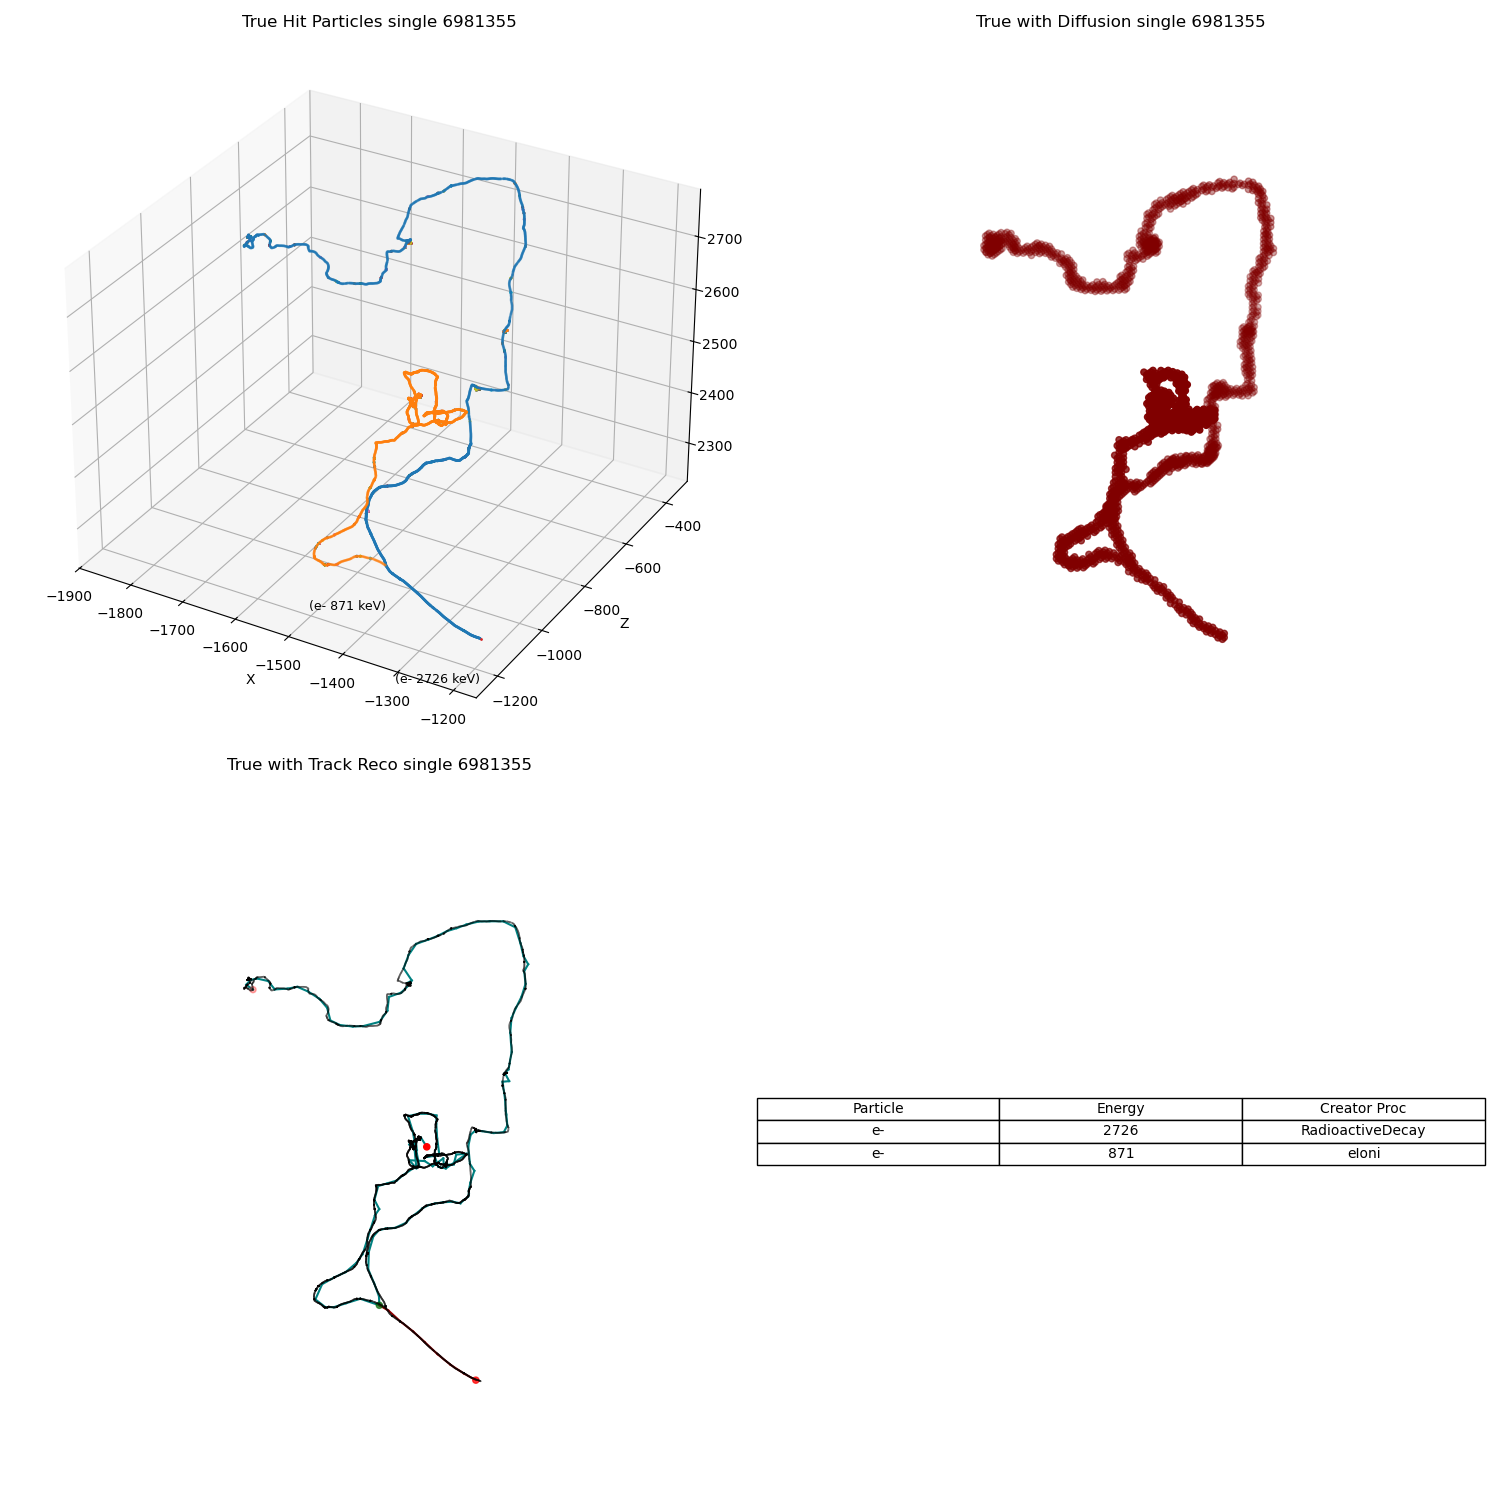

In [ ]:
def Plot3D(id, evid):

    event       = Bkg[Bkg.event_id == evid]
    event.index = event.id
    Track       = Bkg_Tracks[evid]
    connection  = Bkg_connections[evid]
    connection_count = Bkg_connection_counts[evid]
    event_hits_true  = Bkg_true_hits[Bkg_true_hits.event_id == evid]
    event_parts_true = Bkg_true_parts[Bkg_true_parts.event_id == evid]
    event_diffused_hits = Bkg_diffused_hits[Bkg_diffused_hits.event_id == evid]

    # 3D Projection
    fig = plt.figure(figsize=(15, 15))

    # --- First plot: 3D Projection ---
    ax_3D = fig.add_subplot(221, projection='3d')
    for p in event_hits_true.particle_id.unique():

        ax_3D.scatter(event_hits_true[event_hits_true.particle_id == p]['x'], 
                    event_hits_true[event_hits_true.particle_id == p]['y'], 
                    event_hits_true[event_hits_true.particle_id == p]['z'], 
                    marker='o', s=1)

    display(event_parts_true[event_parts_true.kin_energy > 0.1])
    electron_df = pd.DataFrame()
    for index, row in event_parts_true[event_parts_true.kin_energy > 0.1].iterrows():
        Energy = round(row["kin_energy"] * 1000)
        particle_name = row["particle_name"]
        creator_proc = row["creator_proc"]

        if particle_name == "gamma" or particle_name == "anti_nu_e":
            continue

        if row["initial_volume"] != "GAS":
            continue

        ax_3D.text(row["initial_x"], row["initial_y"], row["initial_z"] + 3000, 
                f"({particle_name} {Energy} keV)", fontsize=9, ha='right', va='bottom', color='black')
        print(particle_name, Energy, creator_proc)
        if (particle_name == "e-" and row["initial_volume"] == "GAS"):
            new_row = {"Particle":particle_name, "Energy": Energy, "Creator Proc":creator_proc}
            electron_df = pd.concat([electron_df, pd.DataFrame([new_row])], ignore_index=True)


    ax_3D.set_title(f"True Hit Particles {event.Type.iloc[0]} {evid}")
    ax_3D.set_xlabel("X")
    ax_3D.set_ylabel("Y")
    ax_3D.set_ylabel("Z")


    # event_diffused_hits = CutandRedistibuteEnergy(event_diffused_hits, 0.0004)
    ax2 = fig.add_subplot(222, projection='3d')
    ax2.scatter(event_diffused_hits['x'], event_diffused_hits['y'], event_diffused_hits['z'],c=event_diffused_hits['energy'], s=0.5)
    # ax2.scatter(event_diffused_hits['x'], event_diffused_hits['y'], event_diffused_hits['z'],c="maroon")
    ax2.set_xlabel("X")
    ax2.set_ylabel("Y")
    ax2.set_ylabel("Z")
    ax2.set_title(f"True with Diffusion {event.Type.iloc[0]} {evid}")
    
    # Remove Background
    # ax2.set_axis_off()
    # ax2.grid(False)
    # ax2.set_facecolor('none')  # transparent background

    ax3 = fig.add_subplot(223, projection='3d')
    ax3.scatter(event_hits_true['x'], event_hits_true['y'], event_hits_true['z'],c="k", s=0.1)
    plot_tracks_3D(ax3, event['x'], event['y'], event['z'], connection_count, Track)
    ax3.set_xlabel("X")
    ax3.set_ylabel("Y")
    ax3.set_ylabel("Z")
    ax3.set_title(f"True with Track Reco {event.Type.iloc[0]} {evid}")

    ax4 = fig.add_subplot(224)
    ax4.axis("off")  # Hide axis
    # Create the table
    table = ax4.table(
        cellText=electron_df.values,
        colLabels=electron_df.columns,
        cellLoc="center",
        loc="center"
    )

    # Style the table
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    # table.scale(1.2, 1.2)

    # Remove axes, grid, and background
    ax3.set_axis_off()
    ax3.grid(False)
    ax3.set_facecolor('none')  # transparent background

    # Optional: make figure background white (or transparent)
    fig.patch.set_facecolor('white')  # or 'none'

    plt.tight_layout()
    plt.savefig(f"plots/SelectedEvents/{event.Type.iloc[0]}/{id}_{event.Type.iloc[0]}_{evid}.png")
    # plt.close()

for index, e in enumerate(event_list):
    print("On Event:", index, e)
    if (index > 100):
        break

    if (index !=4):
        continue
    Plot3D(index, e)


Text(0, 0.5, 'Tortuosity')

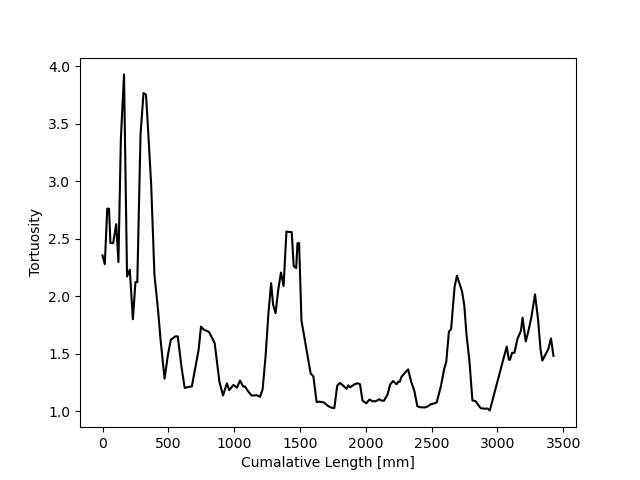

In [6]:
plt.figure()

# plt.hist2d(event.cumulative_distance, event.angle, bins = 20,cmin=3);
plt.plot(event[event.primary == 1].cumulative_distance, event[event.primary == 1].Tortuosity, color="k");

plt.xlabel("Cumalative Length [mm]")
plt.ylabel("Tortuosity")

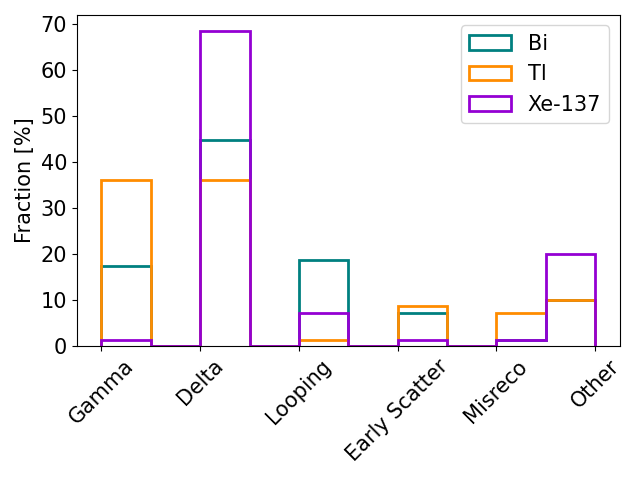

In [7]:
# Make a plot of the event summaries

Categories = ["Gamma", "Delta", "Looping", "Early Scatter", "Misreco", "Other"]
Bi_sel = np.array([12,31,13,5,1,7])
Tl_sel = np.array([25,25,1,6,5,7])
single_sel = np.array([1,48,5,1,1,14])

plt.figure()
plt.hist(Categories, weights = 100*Bi_sel/np.sum(Bi_sel), histtype="step", linewidth=2, label = "Bi", color = "Teal");
plt.hist(Categories, weights = 100*Tl_sel/np.sum(Tl_sel), histtype="step", linewidth=2, label = "Tl", color = "DarkOrange");
plt.hist(Categories, weights = 100*single_sel/np.sum(single_sel), histtype="step", linewidth=2, label = "Xe-137", color="darkviolet");

plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Fraction [%]", fontsize=15)
plt.legend(fontsize=15)

plt.tight_layout()